# Source Code for Exploratory Data Analysis


## Loading the Dataset

The dataset link is found below:

<https://www.kaggle.com/datasets/cashbowman/ai-generated-images-vs-real-images>


### Import Tensorflow, Keras, and making sure GPU support is available


In [25]:
import sys
import tensorflow as tf
import keras
import platform
print(f"Python Platform: {platform.version()}")
print(f"Python Version: {sys.version}")
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print()
gpu = len(tf.config.list_physical_devices('GPU')) > 0
print(f"GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Darwin Kernel Version 23.4.0: Fri Mar 15 00:19:22 PDT 2024; root:xnu-10063.101.17~1/RELEASE_ARM64_T8112
Python Version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:51:49) [Clang 16.0.6 ]
Tensorflow version: 2.16.1
Keras version: 3.2.1

GPU is available


### Utility Method to load datasets into Tensorflow Data


In [26]:
import os
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
def load_dataset(path):
    all_files = [os.path.join(path, f) for f in os.listdir(path)]
    valid_files = [f for f in all_files if f.split('.')[-1].lower() in img_type_accepted_by_tf]
    return tf.data.Dataset.from_tensor_slices(valid_files)

def preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3)
    return image

In [27]:
AI_ART_PATH = 'dataset/AI Art vs Real Art/AI Art/AiArtData'
REAL_ART_PATH = 'dataset/AI Art vs Real Art/Real/RealArt'
ai_images = load_dataset(AI_ART_PATH).map(preprocess_image)
real_images = load_dataset(REAL_ART_PATH).map(preprocess_image)

## The AI Art Dataset


### THe Total Number of AI Art

In [28]:
print(f'The total number of AI Art in the dataset is {len(os.listdir(AI_ART_PATH))}')

The total number of AI Art in the dataset is 506


### Display Sample Images

In [29]:
import matplotlib.pyplot as plt
import numpy as np
def display_samples(dataset, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(dataset.take(num_samples)):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.numpy())
        plt.axis('off')
    plt.show()

Sample images from AI dataset:


2024-05-19 19:26:48.742312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


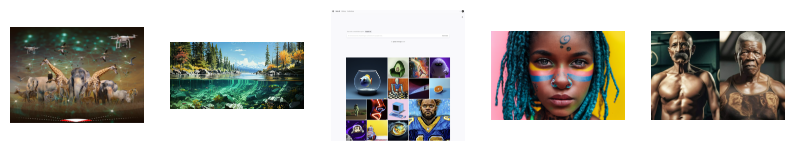

In [30]:
print("Sample images from AI dataset:")
display_samples(ai_images)

## The Real Art Dataset

### The Total Number of Real Art

In [31]:
print(f'The total number of Real Art in the dataset is {len(os.listdir(REAL_ART_PATH))}')

The total number of Real Art in the dataset is 410


### Display Sample Images

Sample images from Real dataset:


2024-05-19 19:26:49.353697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


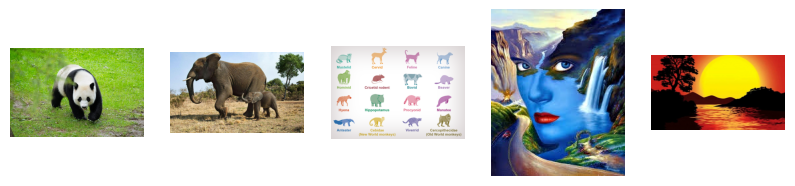

In [32]:
print("Sample images from Real dataset:")
display_samples(real_images)